**QUESTION 1**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import pandas as pd

In [ ]:
class SVM(object):
    def __init__(self,visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    
    def fit(self,data):
        #train with data
        self.data = data
        # { |\w\|:{w,b}}
        opt_dict = {}
        
        transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
        
        all_data = np.array([])
        for yi in self.data:
            all_data = np.append(all_data,self.data[yi])
                    
        self.max_feature_value = max(all_data)         
        self.min_feature_value = min(all_data)
        all_data = None
        
        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      self.max_feature_value * 0.001,]
        
        b_range_multiple = 5
        b_multiple = 5
        
        latest_optimum = self.max_feature_value*10
        
        
        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            
            optimized = False
            while not optimized:
                for b in np.arange(-1*self.max_feature_value*b_range_multiple,
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b)>=1:
                                    found_option=False
                        if found_option:
                            
                            opt_dict[np.linalg.norm(w_t)]=[w_t,b]
                
                if w[0]<0:
                    optimized=True
                    print("optimized a step")
                else:
                    w = w-step
                    
            norms = sorted([n for n in opt_dict])
            opt_choice = opt_dict[norms[0]]

            self.w=opt_choice[0]
            self.b=opt_choice[1]
            
            latest_optimum = opt_choice[0][0]+step*2
    
    def predict(self,features):
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification!=0 and self.visualization:
            self.ax.scatter(features[0],features[1],s=200,marker='*',c=self.colors[classification])
        return (classification,np.dot(np.array(features),self.w)+self.b)
    
    def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,c=self.colors[i]) for x in data_dict[i]] for i in data_dict]
        
        def hyperplane(x,w,b,v):
            #returns a x2 value on line when given x1
            return (-w[0]*x-b+v)/w[1]
       
        hyp_x_min= self.min_feature_value*0.9
        hyp_x_max = self.max_feature_value*1.1
        
        pav1 = hyperplane(hyp_x_min,self.w,self.b,1)
        pav2 = hyperplane(hyp_x_max,self.w,self.b,1)
        self.ax.plot([hyp_x_min,hyp_x_max],[pav1,pav2],'k')
        
        nav1 = hyperplane(hyp_x_min,self.w,self.b,-1)
        nav2 = hyperplane(hyp_x_max,self.w,self.b,-1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nav1,nav2],'k')
        
        db1 = hyperplane(hyp_x_min,self.w,self.b,0)
        db2 = hyperplane(hyp_x_max,self.w,self.b,0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2],'y--')

In [ ]:
data_dict = {-1:np.array([[1,7],[2,8],[3,8]]),1:np.array([[5,1],[6,-1],[7,3]])}
data_dict[-1][0]

array([1, 7])

optimized a step
optimized a step
optimized a step


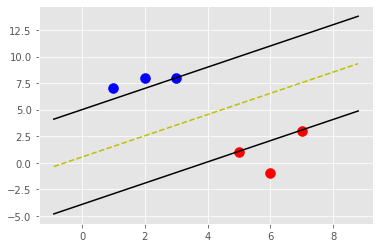

In [ ]:
svm = SVM() 
svm.fit(data=data_dict)
svm.visualize()

In [ ]:
svm.predict([3,8])

(-1.0, -1.000000000000098)

In [ ]:
df = pd.read_excel('data.xlsx')
d = {-1.000000:[],1.000000:[]}

In [ ]:
for i in range(350):
  l = [df.iloc[i][0],df.iloc[1][1]]
  d[df.iloc[i][2]].append(l)

In [ ]:
data2 = {}

In [ ]:
data2[-1.0]=np.array(d[-1.0])
data2[1.0]=np.array(d[1.0])

In [ ]:
data2

{-1.0: array([[8.40116942, 7.91302285],
        [6.25113397, 7.91302285],
        [8.26864113, 7.91302285],
        [7.7914091 , 7.91302285],
        [5.59151257, 7.91302285],
        [8.250217  , 7.91302285],
        [8.72897066, 7.91302285],
        [7.22309596, 7.91302285],
        [8.41904079, 7.91302285],
        [5.9597379 , 7.91302285],
        [8.15924215, 7.91302285],
        [8.74007663, 7.91302285],
        [8.41447651, 7.91302285],
        [6.40790406, 7.91302285],
        [6.89074985, 7.91302285],
        [7.17688424, 7.91302285],
        [8.97866274, 7.91302285],
        [7.6156746 , 7.91302285],
        [8.80718026, 7.91302285],
        [7.21654775, 7.91302285],
        [7.03281296, 7.91302285],
        [8.2042945 , 7.91302285],
        [8.10423299, 7.91302285],
        [7.05016424, 7.91302285],
        [5.68550018, 7.91302285],
        [5.80737645, 7.91302285],
        [8.29295085, 7.91302285],
        [7.79453831, 7.91302285],
        [5.61317444, 7.91302285],
        

optimized a step
optimized a step
optimized a step


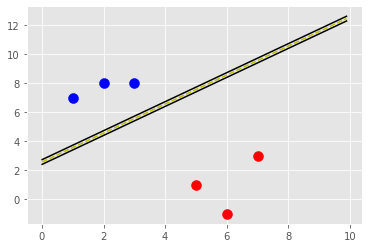

In [ ]:
svm2 = SVM()
svm2.fit(data2)
svm2.visualize()

In [ ]:
data2[-1][5]

array([8.250217  , 7.91302285])

In [ ]:
svm2.predict(data2[1][56])

(1.0, 24.74074460210661)